In [7]:
import pandas as pd
import functions as cf
import matplotlib.pyplot as plt
import seaborn as sns

Load DataSet from CSV with Pandas

In [2]:
main = pd.read_csv('../Raw_Data/Prostate_GSE46602.csv')
main.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349,...,13.852908,13.854510,14.953006,14.824910,3.710845,2.493435,2.913242,2.360155,2.758725,2.779035
1,137,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692,...,13.784316,13.776588,14.944678,14.798245,3.840439,2.452855,2.657462,2.480106,2.811486,3.098742
2,138,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062,...,13.833406,13.853554,14.929317,14.749283,3.960969,2.593110,2.839218,2.483863,2.939876,2.761388
3,139,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994,...,13.601130,13.604113,14.927910,14.753407,3.821295,2.629036,2.798198,2.487149,2.652175,2.600322
4,141,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670,...,13.961861,13.933318,14.994563,14.803339,3.990229,2.862215,2.766505,2.229823,2.630706,2.588111


Perform a Quantile Transformation

In [4]:
main_transformed, qt = cf.quantileTransformer(main)
main_transformed.head()

C:\Users\timmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (49). n_quantiles is set to n_samples.
  warnings.warn(


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,5.199338,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,-5.199338,-5.199338,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


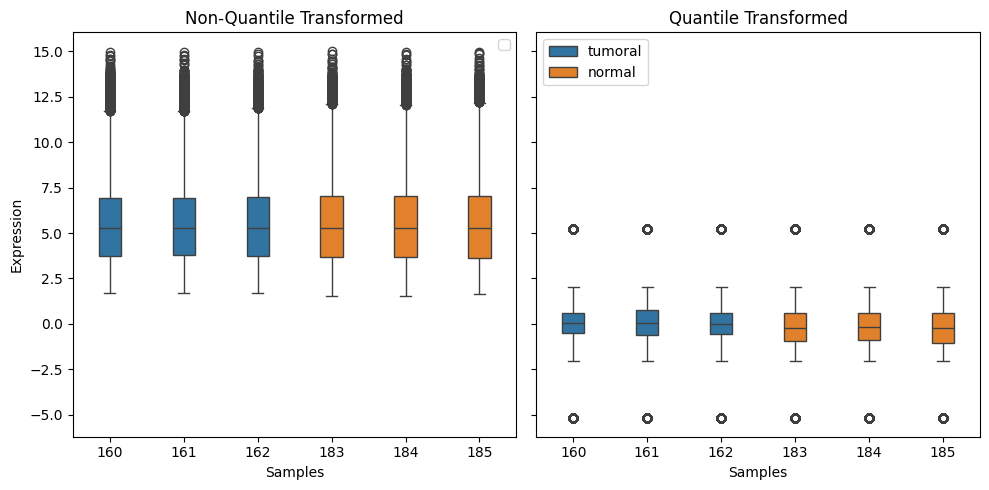

In [8]:
# Create two melted dataframs to explore within graphs
transformed_melt = main_transformed.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression').sort_values('type')
main_melt = main.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression').sort_values('type')

qt_set = transformed_melt.copy()
qt_set.head()
qt_set = qt_set[qt_set['samples'].isin([185, 184, 183, 160, 161, 162])]

main_set = main_melt.copy()
main_set.head()
main_set = main_set[main_set['samples'].isin([185, 184, 183, 160, 161, 162])]

# plot log transformed data on boxplot
f, ax = plt.subplots(1,2,figsize=(10, 5), sharey=True, sharex=True)
ax[1] = sns.boxplot(x='samples', y='expression', hue = 'type',  data=qt_set, width = 0.3, ax=ax[1])
ax[0] = sns.boxplot(x='samples', y='expression', hue = 'type',  data=main_set, width = 0.3, ax=ax[0])

ax[0].legend([])
ax[1].legend(loc='upper left')

ax[1].set_title('Quantile Transformed')
ax[0].set_title('Non-Quantile Transformed')

ax[0].set_xlabel('Samples')
ax[1].set_xlabel('Samples')
ax[0].set_ylabel('Expression')

# Show the plot
plt.tight_layout()
plt.show()


Perform a two sample T Test

Check Multi collonairt

Train Model

Check Model stats / See on other sets